# Optimising Hyperparameters 

Concepts:
- Hyperparameters
- Grid search - Used to optimise hyperparameters
- Random search

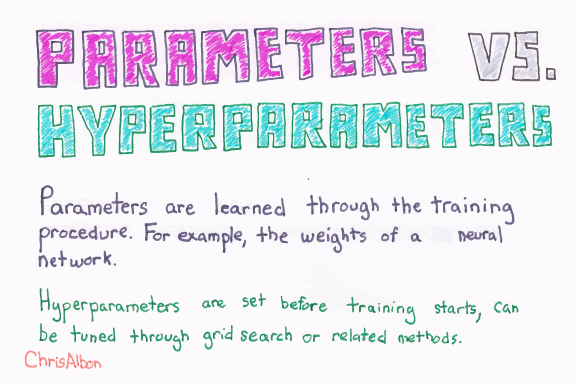

## RandomForestClassifier Example Continued

**1. Read Data in Pandas**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train.csv', index_col=0)

**2. Split data into X and y**

In [3]:
X = df[['Pclass', 'Sex', 'Fare']]
y = df['Survived']

**3. Split X data into training and testing sets**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 3), (223, 3), (668,), (223,))

**4. Exploratory Data Analysis**

**5. Feature Engineering**

In [6]:
#Four options for encoding strings to numbers:

    #1. LabelEncoder
    #2. pd.factorize()
    #3. pd.get_dummies()
    #4. .map()

def feature_engineer(dataframe):
    d = {'female': 0, 'male': 1}

    dataframe = dataframe.copy() #just to suppress the warning! Removing link to previous dataframe.
    dataframe['Sex'] = dataframe['Sex'].map(d)
    
    return dataframe

In [7]:
X_train = feature_engineer(X_train)

In [8]:
X_train.head()

,Pclass,Sex,Fare
PassengerId,,,
299,1,1,30.5000
885,3,1,7.0500
248,2,0,14.5000
479,3,1,7.5208
306,1,1,151.5500


**6. "Build" a Random Forest model and train it**

In [9]:
m = RandomForestClassifier(n_estimators=5, max_depth=10, 
                           criterion='gini', random_state=42)

In [10]:
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8892215568862275

In [11]:
X_test = feature_engineer(X_test)
m.score(X_test, y_test)

0.8295964125560538

**7. Cross-Validate**

**8. Assess Model Quality**
i.e. recall_score, precision_score, accuracy_score


In [12]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [13]:
ypred = m.predict(X_train)

In [14]:
print(f'Accuracy Score: {accuracy_score(y_train, ypred)}')
print(f'Recall Score: {recall_score(y_train, ypred)}')
print(f'Precision Score: {precision_score(y_train, ypred)}')

Accuracy Score: 0.8892215568862275
Recall Score: 0.7905138339920948
Precision Score: 0.9049773755656109


**9. Optimize Hyperparameters**

In [15]:
trees = list(range(1, 21))
depth = list(range(1, 21))

In [16]:
trees

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [17]:
for t in trees: 
    for d in depth:
        
        rf = RandomForestClassifier(n_estimators=t, max_depth=d,
                                   criterion='gini', random_state=42)
        rf.fit(X_train, y_train)
        
        score = rf.score(X_train, y_train)
        
        print(f'Trees: {t}, Depth: {d}, Score: {score}')

Trees: 1, Depth: 1, Score: 0.6646706586826348
Trees: 1, Depth: 2, Score: 0.7889221556886228
Trees: 1, Depth: 3, Score: 0.7889221556886228
Trees: 1, Depth: 4, Score: 0.8083832335329342
Trees: 1, Depth: 5, Score: 0.7904191616766467
Trees: 1, Depth: 6, Score: 0.8143712574850299
Trees: 1, Depth: 7, Score: 0.8278443113772455
Trees: 1, Depth: 8, Score: 0.8502994011976048
Trees: 1, Depth: 9, Score: 0.8577844311377245
Trees: 1, Depth: 10, Score: 0.8547904191616766
Trees: 1, Depth: 11, Score: 0.8547904191616766
Trees: 1, Depth: 12, Score: 0.8562874251497006
Trees: 1, Depth: 13, Score: 0.8577844311377245
Trees: 1, Depth: 14, Score: 0.8562874251497006
Trees: 1, Depth: 15, Score: 0.8637724550898204
Trees: 1, Depth: 16, Score: 0.8637724550898204
Trees: 1, Depth: 17, Score: 0.8637724550898204
Trees: 1, Depth: 18, Score: 0.8637724550898204
Trees: 1, Depth: 19, Score: 0.8637724550898204
Trees: 1, Depth: 20, Score: 0.8637724550898204
Trees: 2, Depth: 1, Score: 0.6841317365269461
Trees: 2, Depth: 2, Sco

Trees: 10, Depth: 9, Score: 0.8922155688622755
Trees: 10, Depth: 10, Score: 0.8862275449101796
Trees: 10, Depth: 11, Score: 0.8952095808383234
Trees: 10, Depth: 12, Score: 0.8982035928143712
Trees: 10, Depth: 13, Score: 0.8982035928143712
Trees: 10, Depth: 14, Score: 0.8982035928143712
Trees: 10, Depth: 15, Score: 0.8997005988023952
Trees: 10, Depth: 16, Score: 0.8997005988023952
Trees: 10, Depth: 17, Score: 0.8997005988023952
Trees: 10, Depth: 18, Score: 0.8997005988023952
Trees: 10, Depth: 19, Score: 0.8997005988023952
Trees: 10, Depth: 20, Score: 0.8997005988023952
Trees: 11, Depth: 1, Score: 0.781437125748503
Trees: 11, Depth: 2, Score: 0.7919161676646707
Trees: 11, Depth: 3, Score: 0.8263473053892215
Trees: 11, Depth: 4, Score: 0.8248502994011976
Trees: 11, Depth: 5, Score: 0.8278443113772455
Trees: 11, Depth: 6, Score: 0.8652694610778443
Trees: 11, Depth: 7, Score: 0.8682634730538922
Trees: 11, Depth: 8, Score: 0.8817365269461078
Trees: 11, Depth: 9, Score: 0.8877245508982036
Tre

Trees: 19, Depth: 10, Score: 0.8982035928143712
Trees: 19, Depth: 11, Score: 0.8967065868263473
Trees: 19, Depth: 12, Score: 0.9041916167664671
Trees: 19, Depth: 13, Score: 0.905688622754491
Trees: 19, Depth: 14, Score: 0.905688622754491
Trees: 19, Depth: 15, Score: 0.907185628742515
Trees: 19, Depth: 16, Score: 0.907185628742515
Trees: 19, Depth: 17, Score: 0.907185628742515
Trees: 19, Depth: 18, Score: 0.907185628742515
Trees: 19, Depth: 19, Score: 0.907185628742515
Trees: 19, Depth: 20, Score: 0.907185628742515
Trees: 20, Depth: 1, Score: 0.7769461077844312
Trees: 20, Depth: 2, Score: 0.7919161676646707
Trees: 20, Depth: 3, Score: 0.8248502994011976
Trees: 20, Depth: 4, Score: 0.8293413173652695
Trees: 20, Depth: 5, Score: 0.8263473053892215
Trees: 20, Depth: 6, Score: 0.8502994011976048
Trees: 20, Depth: 7, Score: 0.874251497005988
Trees: 20, Depth: 8, Score: 0.8877245508982036
Trees: 20, Depth: 9, Score: 0.8892215568862275
Trees: 20, Depth: 10, Score: 0.8937125748502994
Trees: 20,

In [18]:
best_score = 0.0

for t in trees: 
    for d in depth:
        
        rf = RandomForestClassifier(n_estimators=t, max_depth=d,
                                   criterion='gini', random_state=42)
        rf.fit(X_train, y_train)
        
        score = rf.score(X_train, y_train)
        
        if score > best_score:
            best_score = score
            print(f'Trees: {t}, Depth: {d}, Score: {score}')

Trees: 1, Depth: 1, Score: 0.6646706586826348
Trees: 1, Depth: 2, Score: 0.7889221556886228
Trees: 1, Depth: 4, Score: 0.8083832335329342
Trees: 1, Depth: 6, Score: 0.8143712574850299
Trees: 1, Depth: 7, Score: 0.8278443113772455
Trees: 1, Depth: 8, Score: 0.8502994011976048
Trees: 1, Depth: 9, Score: 0.8577844311377245
Trees: 1, Depth: 15, Score: 0.8637724550898204
Trees: 2, Depth: 8, Score: 0.8682634730538922
Trees: 2, Depth: 9, Score: 0.8772455089820359
Trees: 2, Depth: 13, Score: 0.8802395209580839
Trees: 2, Depth: 14, Score: 0.8832335329341318
Trees: 4, Depth: 9, Score: 0.8847305389221557
Trees: 4, Depth: 12, Score: 0.8862275449101796
Trees: 4, Depth: 13, Score: 0.8877245508982036
Trees: 4, Depth: 14, Score: 0.8907185628742516
Trees: 5, Depth: 12, Score: 0.8937125748502994
Trees: 5, Depth: 14, Score: 0.8952095808383234
Trees: 5, Depth: 15, Score: 0.8967065868263473
Trees: 9, Depth: 14, Score: 0.8997005988023952
Trees: 9, Depth: 15, Score: 0.9011976047904192
Trees: 12, Depth: 12, S

#### Alternatively:

In [19]:
best_score = 0.0
scores = []

for t in trees: 
    for d in depth:
        
        rf = RandomForestClassifier(n_estimators=t, max_depth=d,
                                   criterion='gini', random_state=42)
        rf.fit(X_train, y_train)
        
        score = rf.score(X_train, y_train)
        
        if score > best_score:
            best_score = score
            
            scores.append((t, d, score))

In [20]:
scores

[(1, 1, 0.6646706586826348),
 (1, 2, 0.7889221556886228),
 (1, 4, 0.8083832335329342),
 (1, 6, 0.8143712574850299),
 (1, 7, 0.8278443113772455),
 (1, 8, 0.8502994011976048),
 (1, 9, 0.8577844311377245),
 (1, 15, 0.8637724550898204),
 (2, 8, 0.8682634730538922),
 (2, 9, 0.8772455089820359),
 (2, 13, 0.8802395209580839),
 (2, 14, 0.8832335329341318),
 (4, 9, 0.8847305389221557),
 (4, 12, 0.8862275449101796),
 (4, 13, 0.8877245508982036),
 (4, 14, 0.8907185628742516),
 (5, 12, 0.8937125748502994),
 (5, 14, 0.8952095808383234),
 (5, 15, 0.8967065868263473),
 (9, 14, 0.8997005988023952),
 (9, 15, 0.9011976047904192),
 (12, 12, 0.9026946107784432),
 (12, 13, 0.9041916167664671),
 (12, 15, 0.905688622754491),
 (18, 15, 0.907185628742515)]

#### But we haven't included any Cross-Validation!

In [21]:
from sklearn.model_selection import cross_val_score

In [25]:
best_score = 0.0
running_scores = []

for t in trees: 
    for d in depth:
        
        rf = RandomForestClassifier(n_estimators=t, max_depth=d,
                                   criterion='gini', random_state=42)
        rf.fit(X_train, y_train)
        
        scores = cross_val_score(rf, X_train, y_train, cv = 5)
        
        score = scores.mean()
        
        if score > best_score:
            best_score = score
#             print(f'Trees: {t}, Depth: {d}, Score: {score}')
            running_scores.append((t, d, score))

In [26]:
running_scores

[(1, 1, 0.654146560430928),
 (1, 2, 0.7515991471215353),
 (1, 4, 0.7739872068230277),
 (1, 5, 0.7934575244080351),
 (3, 7, 0.7949051733812141),
 (4, 7, 0.794927617551341),
 (5, 7, 0.8039052856020648),
 (6, 3, 0.8084053417124901),
 (6, 7, 0.8098866569408596),
 (10, 3, 0.8113679721692291)]

### Now we can apply this! 
- n_estimators = 10, max_depth = 3 for the best cross-validation score!
- n_estimators = 18, max_depth = 15 for the best accuracy without C-V!


In [27]:
m = RandomForestClassifier(n_estimators=10, max_depth=3,
                          criterion='gini', random_state=42)

m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8263473053892215

In [28]:
m.score(X_test, y_test)

0.8071748878923767

#### These scores are fairly close together, not very much overfitting so this is a great attempt!

In [29]:
m = RandomForestClassifier(n_estimators=18, max_depth=15,
                          criterion='gini', random_state=42)

m.fit(X_train, y_train)
m.score(X_train, y_train)

0.907185628742515

In [30]:
m.score(X_test, y_test)

0.8340807174887892

#### This score hasn't faired so well, we have a great amount of overfitting! Therefore we can conclude it's best to use Cross-Validation when working out what the best number of estimators and the depth should be!

### **Is there a quicker way to do this?**

## GridSearch

**Hyperparameter Tuning** or **Model Selection** is about finding the hyperparameters that produce the best model.

**Grid Search** is a model selection strategy that tries every possible combination of hyperparamters and uses the combination that produces the best scoring.

**Randomized Search** - a model selection strategy where candidate hyperparameter values are selected randomly from distributions (e.g. Normal, Uniform). It is more computationally efficient than grid search, and we can specify the number of combinations to test.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'n_estimators': range(1, 21),
    'max_depth': range(1, 21)
}

In [33]:
grid = GridSearchCV(m, param_grid = param_grid)

In [34]:
grid.fit(X_train, y_train)

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(1, 21), 'max_depth': range(1, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
results = grid.cv_results_
results_df = pd.DataFrame(results)
mean_scores = results_df['mean_test_score']

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/maximc

In [56]:
results_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.010483,0.001442,0.005706,0.003791,1,1,"{'max_depth': 1, 'n_estimators': 1}",0.665179,0.68018,0.648649,0.664671,0.012858,400,0.664414,0.656951,0.672646,0.66467,0.00641


In [60]:
mean_scores.head()

0    0.664671
1    0.667665
2    0.770958
3    0.779940
4    0.745509
Name: mean_test_score, dtype: float64

### Validation Curve

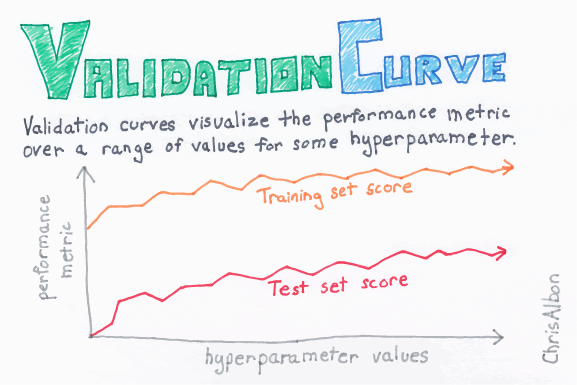

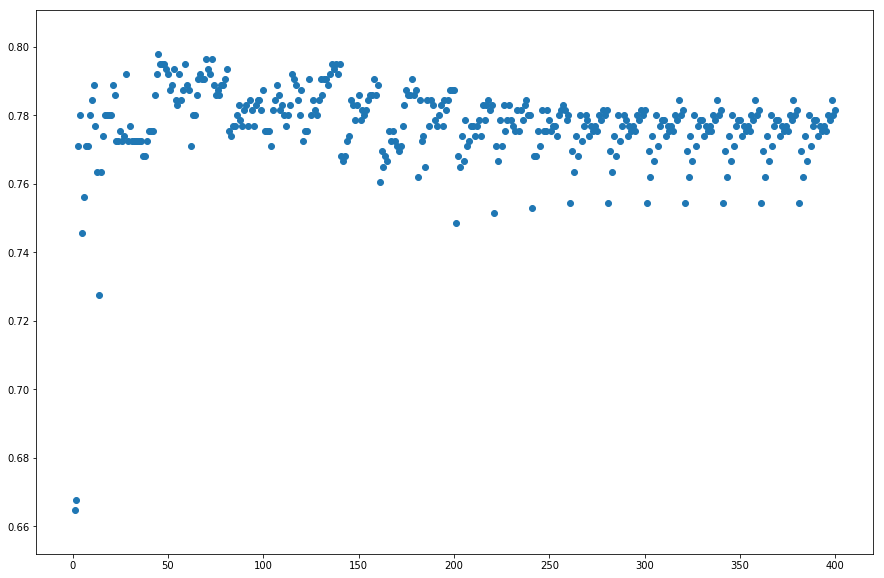

In [48]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.scatter(range(1,401), mean_scores)

In [49]:
grid.best_score_

0.7979041916167665

In [50]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 5}

In [51]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

# We only really need this line:

In [52]:
final_model = grid.best_estimator_

In [53]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
final_model.score(X_train, y_train)

0.8068862275449101

In [55]:
final_model.score(X_test, y_test)

0.7802690582959642

## So, the lines we need are:

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(log_reg, param_grid = {'n_estimators': [0.1, 1.0, 10.0],'max_depth': range(1, 21)})
grid.fit(X, y)
final_model = grid.best_estimator_
final_model.fit(Xtrain, ytrain)
final_model.score(Xtrain, ytrain)
final_model.score(Xtest, ytest)